In [126]:
# J E Umaña and Victor Z
# UW-Madison, 2024
# Tutorial on neural networks for ionic liquid property predictions

# ***Introduction***

**Neural networks are an interconnected collection of simple relationships used to recreate unkown, complex relationship**

* Neural networks consist of nodes which collectively model relationships between available input information and a desired output prediction. Each of these nodes captures a simple (often linear) portion of a more complex mathematical relationship. With enough nodes and data, neural networks are capabale of universally approximating any variable relationships. 

* Nodes in neural networks are organized into layers. 3 types of layers, input, output, and hidden layers, compose neural networks. Input layers take in information to be related to the output, output layers provide final neural network approximations, and hidden layers perform mathematical manipulations to relate the input to the output.

* Nodes in a hidden layer each model a linear portion of a more complex relationship, and their combination can approximate even non-linear, non-continous, and non-smooth relationships. This allows neural netowkrs to approximate any variable relationship.

* As many chemical engineering problems do not have known analytical solutions, neural networks become very useful for modeling complex engineering problems.

**Ionic liquids property modeling**

* Ionic liquids are an emerging non-flammable electrolyte material with growing interest in application for energy storage purposes due to their sustainable and tunable properties.

* Ionic liquids are composed of organic and inorganic ion cores with highly tunable substituent functional groups. This is promising for application-specific electrolyte design, and it is estimate that greater than 10^6 possible ionic liquid materials.

* Given the large number of possible ionic liquids, it is impossible to synthesize and evaluate all of these materials. Yet, the complex interactions in these ionic fluids invalidates the assumptions of many classical property models. Instead, neural networks can be used to model these complex property relationships.

* Here, we will use neural networks to predict the properties of ionic liquids based on published experimental property measurements.

# ![Jose](Jose_Celso_Barbosa.jpg)

# Import Data

In [127]:
import numpy as np # NumPy is a computing package for python. More info here: https://numpy.org/doc/stable/
import pandas as pd # Pandas enables the use of DataFrames for data visualization and management. More info here: https://pandas.pydata.org/

In [128]:
# !git clone https://github.com/Ikegwuugo/t-SNE.git
# import os   # This is a portable way of working with operating systems such as changing directories, read/write files, etc.
#             # For more info visit https://docs.python.org/3/library/os.html
# os.chdir('t-SNE/')

In [129]:
# Import data
data = pd.read_csv('RDKit_Heat_capacity_data.csv')

In [130]:
# Visualize the dataset
data.head(5)

,compString,numAtomsCation,numAtomsAnion,SimVolume_cation,SimVolume_anion,Sim_rCation,Sim_rAnion,Sim_vCation/vAnion,polarArea_Cation,polarArea_Anion,...,MaxPartialCharge_anion,Asphericity_cation_std%,Spherocity_cation_std%,Asphericity_anion_std%,Spherocity_anion_std%,Smiles_anion,Smiles_cation,Mols_cation,Mols_anion,Heat_capacity_at_constant_pressure
0,"['1-butyl-1-methylpyrrolidinium', 'tricyanomet...",30,7,167.69648,81.77344,3.420000e-10,2.690000e-10,2.050745,0.0,48.6,...,0.148110,20.059394,8.605392,1.030000e-07,190.922456,C(=C(C#N)C#N)=[N-],CCCC[N+]1(CCCC1)C,<rdkit.Chem.rdchem.Mol object at 0x7fd5bd65f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e590>,421.0
1,"['1-butyl-1-methylpyrrolidinium', 'tricyanomet...",30,7,167.69648,81.77344,3.420000e-10,2.690000e-10,2.050745,0.0,48.6,...,0.148110,20.059394,8.605392,1.030000e-07,190.922456,C(=C(C#N)C#N)=[N-],CCCC[N+]1(CCCC1)C,<rdkit.Chem.rdchem.Mol object at 0x7fd5bd65f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e590>,420.0
2,"['1-butyl-1-methylpyrrolidinium', 'tricyanomet...",30,7,167.69648,81.77344,3.420000e-10,2.690000e-10,2.050745,0.0,48.6,...,0.148110,20.059394,8.605392,1.030000e-07,190.922456,C(=C(C#N)C#N)=[N-],CCCC[N+]1(CCCC1)C,<rdkit.Chem.rdchem.Mol object at 0x7fd5bd65f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e590>,418.0
3,"['1-Propyl-2-methylpyridinium', 'Bistriflylimi...",24,15,148.70688,156.65568,3.290000e-10,3.340000e-10,0.949259,3.9,103.0,...,0.518578,24.023873,29.092613,8.871813e+00,5.562783,C(F)(F)(F)S(=NS(=O)(=O)C(F)(F)F)(=O)[O-],CCC[N+]1=CC=CC=C1C,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae649f0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e540>,577.0
4,"['1-Propyl-2-methylpyridinium', 'Bistriflylimi...",24,15,148.70688,156.65568,3.290000e-10,3.340000e-10,0.949259,3.9,103.0,...,0.518578,24.023873,29.092613,8.871813e+00,5.562783,C(F)(F)(F)S(=NS(=O)(=O)C(F)(F)F)(=O)[O-],CCC[N+]1=CC=CC=C1C,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae649f0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e540>,578.0


In [131]:
# View all columns
print(data.columns)

Index(['compString', 'numAtomsCation', 'numAtomsAnion', 'SimVolume_cation',
       'SimVolume_anion', 'Sim_rCation', 'Sim_rAnion', 'Sim_vCation/vAnion',
       'polarArea_Cation', 'polarArea_Anion', 'polarArea_IonPair',
       'rotatableBondCount_Cation', 'rotatableBondCount_Anion',
       'rotatableBondCountFraction_Anion', 'rotatableBondCountFraction_Cation',
       'hBondAcceptorCount_Anion', 'hBondAcceptorCount_Cation',
       'hBondDonorCount_Anion', 'hBondDonorCount_Cation',
       'hBond_anionDonorInteraction', 'hBond_cationDonorInteraction',
       'mmCation', 'mmAnion', 'Temperature', 'SimLogP_anion', 'SimLogP_cation',
       'totalBondCount_Anion', 'totalBondCount_Cation', 'Asphericity_cation',
       'Spherocity_cation', 'Asphericity_anion', 'Spherocity_anion',
       'Valence_Electrons_cation', 'Valence_Electrons_anion',
       'MinPartialCharge_anion', 'MinPartialCharge_cation',
       'MaxPartialCharge_cation', 'MaxPartialCharge_anion',
       'Asphericity_cation_std%', '

In [132]:
New_data = data.drop_duplicates(subset=['compString', 'Temperature'])

In [133]:
data.head(5) # Here we can view the data

,compString,numAtomsCation,numAtomsAnion,SimVolume_cation,SimVolume_anion,Sim_rCation,Sim_rAnion,Sim_vCation/vAnion,polarArea_Cation,polarArea_Anion,...,MaxPartialCharge_anion,Asphericity_cation_std%,Spherocity_cation_std%,Asphericity_anion_std%,Spherocity_anion_std%,Smiles_anion,Smiles_cation,Mols_cation,Mols_anion,Heat_capacity_at_constant_pressure
0,"['1-butyl-1-methylpyrrolidinium', 'tricyanomet...",30,7,167.69648,81.77344,3.420000e-10,2.690000e-10,2.050745,0.0,48.6,...,0.148110,20.059394,8.605392,1.030000e-07,190.922456,C(=C(C#N)C#N)=[N-],CCCC[N+]1(CCCC1)C,<rdkit.Chem.rdchem.Mol object at 0x7fd5bd65f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e590>,421.0
1,"['1-butyl-1-methylpyrrolidinium', 'tricyanomet...",30,7,167.69648,81.77344,3.420000e-10,2.690000e-10,2.050745,0.0,48.6,...,0.148110,20.059394,8.605392,1.030000e-07,190.922456,C(=C(C#N)C#N)=[N-],CCCC[N+]1(CCCC1)C,<rdkit.Chem.rdchem.Mol object at 0x7fd5bd65f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e590>,420.0
2,"['1-butyl-1-methylpyrrolidinium', 'tricyanomet...",30,7,167.69648,81.77344,3.420000e-10,2.690000e-10,2.050745,0.0,48.6,...,0.148110,20.059394,8.605392,1.030000e-07,190.922456,C(=C(C#N)C#N)=[N-],CCCC[N+]1(CCCC1)C,<rdkit.Chem.rdchem.Mol object at 0x7fd5bd65f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e590>,418.0
3,"['1-Propyl-2-methylpyridinium', 'Bistriflylimi...",24,15,148.70688,156.65568,3.290000e-10,3.340000e-10,0.949259,3.9,103.0,...,0.518578,24.023873,29.092613,8.871813e+00,5.562783,C(F)(F)(F)S(=NS(=O)(=O)C(F)(F)F)(=O)[O-],CCC[N+]1=CC=CC=C1C,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae649f0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e540>,577.0
4,"['1-Propyl-2-methylpyridinium', 'Bistriflylimi...",24,15,148.70688,156.65568,3.290000e-10,3.340000e-10,0.949259,3.9,103.0,...,0.518578,24.023873,29.092613,8.871813e+00,5.562783,C(F)(F)(F)S(=NS(=O)(=O)C(F)(F)F)(=O)[O-],CCC[N+]1=CC=CC=C1C,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae649f0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e540>,578.0


In [144]:
numerical_data = New_data.select_dtypes(include=np.number) # We only want numerical data for modeling purposes
ID_data = New_data.select_dtypes(exclude=np.number) # We create a seperate dataset with the non-numerical data 

In [145]:
numerical_data.head(5) # We can view the numerical data

,numAtomsCation,numAtomsAnion,SimVolume_cation,SimVolume_anion,Sim_rCation,Sim_rAnion,Sim_vCation/vAnion,polarArea_Cation,polarArea_Anion,polarArea_IonPair,...,Valence_Electrons_anion,MinPartialCharge_anion,MinPartialCharge_cation,MaxPartialCharge_cation,MaxPartialCharge_anion,Asphericity_cation_std%,Spherocity_cation_std%,Asphericity_anion_std%,Spherocity_anion_std%,Heat_capacity_at_constant_pressure
0,30,7,167.69648,81.77344,3.420000e-10,2.690000e-10,2.050745,0.0,48.6,48.6,...,32,-0.761575,-0.326037,0.092412,0.148110,20.059394,8.605392,1.030000e-07,190.922456,421.0
1,30,7,167.69648,81.77344,3.420000e-10,2.690000e-10,2.050745,0.0,48.6,48.6,...,32,-0.761575,-0.326037,0.092412,0.148110,20.059394,8.605392,1.030000e-07,190.922456,420.0
2,30,7,167.69648,81.77344,3.420000e-10,2.690000e-10,2.050745,0.0,48.6,48.6,...,32,-0.761575,-0.326037,0.092412,0.148110,20.059394,8.605392,1.030000e-07,190.922456,418.0
3,24,15,148.70688,156.65568,3.290000e-10,3.340000e-10,0.949259,3.9,103.0,106.9,...,92,-0.756651,-0.202742,0.177693,0.518578,24.023873,29.092613,8.871813e+00,5.562783,577.0
4,24,15,148.70688,156.65568,3.290000e-10,3.340000e-10,0.949259,3.9,103.0,106.9,...,92,-0.756651,-0.202742,0.177693,0.518578,24.023873,29.092613,8.871813e+00,5.562783,578.0


In [146]:
ID_data.head(5) # We can view the non-numerical data

,compString,Smiles_anion,Smiles_cation,Mols_cation,Mols_anion
0,"['1-butyl-1-methylpyrrolidinium', 'tricyanomet...",C(=C(C#N)C#N)=[N-],CCCC[N+]1(CCCC1)C,<rdkit.Chem.rdchem.Mol object at 0x7fd5bd65f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e590>
1,"['1-butyl-1-methylpyrrolidinium', 'tricyanomet...",C(=C(C#N)C#N)=[N-],CCCC[N+]1(CCCC1)C,<rdkit.Chem.rdchem.Mol object at 0x7fd5bd65f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e590>
2,"['1-butyl-1-methylpyrrolidinium', 'tricyanomet...",C(=C(C#N)C#N)=[N-],CCCC[N+]1(CCCC1)C,<rdkit.Chem.rdchem.Mol object at 0x7fd5bd65f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e590>
3,"['1-Propyl-2-methylpyridinium', 'Bistriflylimi...",C(F)(F)(F)S(=NS(=O)(=O)C(F)(F)F)(=O)[O-],CCC[N+]1=CC=CC=C1C,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae649f0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e540>
4,"['1-Propyl-2-methylpyridinium', 'Bistriflylimi...",C(F)(F)(F)S(=NS(=O)(=O)C(F)(F)F)(=O)[O-],CCC[N+]1=CC=CC=C1C,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae649f0>,<rdkit.Chem.rdchem.Mol object at 0x7fd59ae8e540>


In [147]:
X_data = numerical_data.drop('Heat_capacity_at_constant_pressure', axis=1) # Selects variables with which to model heat capacity
Y_data = numerical_data[['Heat_capacity_at_constant_pressure']] # Selects heat capacity as our target output

In [148]:
from sklearn.model_selection import GroupKFold # Import test and train dataset splitting package
from sklearn.preprocessing import StandardScaler # Import a package to scale our data to a mean of 0 and standard deviation of 1

In [149]:
X_Scaler  = StandardScaler()
Y_Scaler = StandardScaler()

X_scaled = pd.DataFrame(X_Scaler.fit_transform(X_data)) # We scale the input data
Y_scaled = pd.DataFrame(Y_Scaler.fit_transform(Y_data)) # We sclae the output data

In [150]:
k_fold = int(5) # Here we create 5 splits of test set data that is organized to avoid placing the same ionic liqiud compound in both the training and test set

train_indices = [0.0]*k_fold
test_indices = [0.0]*k_fold

Train_Input = [[]]*k_fold
Train_Target = [[]]*k_fold
Test_Input = [[]]*k_fold
Test_Target = [[]]*k_fold

i = 0
gss = GroupKFold(n_splits=k_fold)

for train_idx, test_idx in gss.split(X_scaled, X_scaled, ID_data['compString']):
    train_indices[i] = train_idx
    test_indices[i] = test_idx

    Train_Input[i] = X_scaled.iloc[train_indices[i].tolist(),:].values
    Train_Target[i] = Y_scaled.iloc[train_indices[i].tolist(),:].values

    Test_Input[i] = X_scaled.iloc[test_indices[i].tolist(),:].values
    Test_Target[i] = Y_scaled.iloc[test_indices[i].tolist(),:].values

    i += 1

In [151]:
import torch # import neural network packages
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import r2_score, mean_squared_error # Import model evaluation packages

In [152]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Here we build the neural network model

class IL_GNN(nn.Module):
    def __init__(self):
        super(IL_GNN, self).__init__()
        self.n_input = Train_Input[0][0].shape[0] # We set the input size to be the number of columns/features in our dataset
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 64), # We specify the 1st input layer to be 64 nodes
            nn.Sigmoid(),
            nn.Dropout(0),
            nn.Linear(64,32), # We create a second hidden layer of 32 nodes
            nn.Sigmoid(),
            nn.Dropout(0),
            nn.Linear(32,16), # We create a third hidden layer of 16 nodes
            nn.ReLU(0),
            nn.Linear(16,8), # We create a fourth hidden layer of 8 nodes
            nn.ReLU(0),
            nn.Linear(8,1) # We create an output of 1 node which will output our desired property appoximation
        )
    def forward(self,x):
        return self.main(x) # Here we specify the input function for the neural network
    
def weights_init(m): # We initialize the weights to be random numbers between 0 and 1
    torch.manual_seed(5)
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight.data)

IL_gnn = IL_GNN().to(device)

In [153]:
criterion = nn.MSELoss() # We specify using mean squared error as our evaluation metric for our neural network training process
optim_i = optim.Adam(IL_gnn.parameters(), lr=0.000288) # We specify the step size of our numerical solver

torch.manual_seed(7777) # We set a random seed to ensure replicability

Test_check = 10
Print_freq = 500 
epochs = 2000 # We set the number of training iterations to be taken per training sequence
Training_Losses = np.zeros((k_fold,epochs))
Test_Losses = np.zeros((k_fold,int(epochs/Test_check)))

Train_pred = [0.0]*k_fold
Test_pred = [0.0]*k_fold

batch = 256

for k in range(0,5): # We train 5 models using each of the 5 training sets 
    print('Model '+str(k))
    Train_order = np.arange(0,Train_Input[k].shape[0],batch)
    IL_gnn.apply(weights_init)
    for epoch in range(epochs): # We train the specified number of epochs (iterations)
        loss = 0.0
#        np.random.shuffle(Train_order)
        for i in Train_order:
            pred = IL_gnn.forward(torch.Tensor(np.stack(Train_Input[k][i:i+batch]))) # We calculate outputs using the current weights
            optim_i.zero_grad()
            loss_current = criterion(torch.Tensor(pred), torch.Tensor(np.array(Train_Target[k][i:i+batch]))) # We evaluate the error of our current neural network model predictions
            loss_current.backward(retain_graph=True) # We calculate the derivative of our model weights and find the direction of error minimization 
            optim_i.step() # We apply a numerical step to our neural network weights
            loss += loss_current.item()/(len(Train_order))

        if epoch%Test_check == 0:
            T_pred = IL_gnn.forward(torch.Tensor(np.stack(Test_Input[k]))).detach().numpy() # We calculate the outputs for our test set
            Test_loss = mean_squared_error(T_pred, Test_Target[k]) # We calculate the error in our test set to evaluate the model 
            Test_Losses[k][int(epoch/Test_check)] = Test_loss
            if epoch%Print_freq == 0:
                print('Epoch: ' + str(epoch) + ', Loss: ' + str(np.round(loss, 6)) + ', Test Loss: ' + str(np.round(Test_loss, 6)))            
        
        Training_Losses[k][epoch] = loss

    Train_pred[k] =  IL_gnn.forward(torch.Tensor(np.stack(Train_Input[k]))).detach().numpy() # We obtain final training set predictions once training is finished for each of the 5 training sets
    Test_pred[k] = IL_gnn.forward(torch.Tensor(np.stack(Test_Input[k]))).detach().numpy() # We obtain final test set predictions once training is finished for each of the 5 test sets
    
Final_Train_Predictions = Y_Scaler.inverse_transform(np.concatenate((Train_pred[0],Train_pred[1], Train_pred[2], Train_pred[3], Train_pred[4])))
Final_Train_Target = Y_Scaler.inverse_transform(np.concatenate((Train_Target[0],Train_Target[1], Train_Target[2], Train_Target[3], Train_Target[4])))

Final_Test_Predictions = Y_Scaler.inverse_transform(np.concatenate((Test_pred[0],Test_pred[1], Test_pred[2], Test_pred[3], Test_pred[4])))
Final_Test_Target = Y_Scaler.inverse_transform(np.concatenate((Test_Target[0],Test_Target[1], Test_Target[2], Test_Target[3], Test_Target[4])))

Model 0
Epoch: 0, Loss: 1.419027, Test Loss: 0.678754
Epoch: 500, Loss: 0.10076, Test Loss: 0.10631
Epoch: 1000, Loss: 0.057521, Test Loss: 0.084191
Epoch: 1500, Loss: 0.032276, Test Loss: 0.077928
Model 1
Epoch: 0, Loss: 1.205958, Test Loss: 0.524042
Epoch: 500, Loss: 0.025527, Test Loss: 0.057014
Epoch: 1000, Loss: 0.018061, Test Loss: 0.04877
Epoch: 1500, Loss: 0.014167, Test Loss: 0.045254
Model 2
Epoch: 0, Loss: 1.327226, Test Loss: 0.518641
Epoch: 500, Loss: 0.016744, Test Loss: 0.10275
Epoch: 1000, Loss: 0.014491, Test Loss: 0.099205
Epoch: 1500, Loss: 0.012571, Test Loss: 0.089716
Model 3
Epoch: 0, Loss: 1.435513, Test Loss: 0.400614
Epoch: 500, Loss: 0.017895, Test Loss: 0.062254
Epoch: 1000, Loss: 0.014915, Test Loss: 0.062869
Epoch: 1500, Loss: 0.012529, Test Loss: 0.089832
Model 4
Epoch: 0, Loss: 0.498411, Test Loss: 2.327983
Epoch: 500, Loss: 0.020064, Test Loss: 0.546285
Epoch: 1000, Loss: 0.015088, Test Loss: 0.446103
Epoch: 1500, Loss: 0.012981, Test Loss: 0.388065


In [154]:
import matplotlib.pyplot as plt # We import plotting packages

In [155]:
Property, Prop_name, Units = "Heat_capacity_at_constant_pressure", "Heat Capacity", '($\mathregular{J \cdot mol^{-1} \cdot K^{-1})}$)'

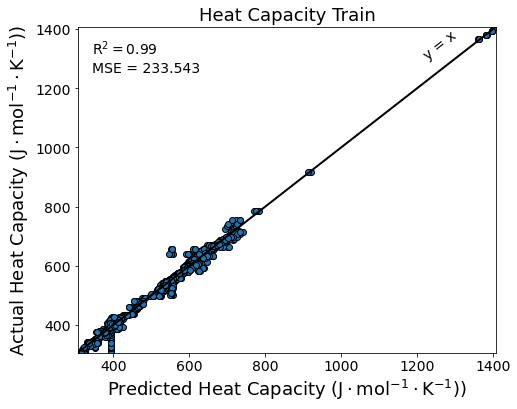

In [156]:
fig,ax1=plt.subplots(1,figsize=(7.5,6), facecolor='white') # We graph our training set predictions
ax1.grid(color='gray',axis='both',alpha=0)
ax1.set_axisbelow(True)

ax1.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)
ax1.set_facecolor('none')

ax1.set_xlim(np.floor(Final_Train_Target.min()), np.ceil(Final_Train_Target.max()))
ax1.set_ylim(np.floor(Final_Train_Target.min()), np.ceil(Final_Train_Target.max()))

ax1.set_xlabel('Predicted ' + Prop_name + ' ' + Units, fontsize=18)
ax1.set_ylabel('Actual ' + Prop_name + ' ' + Units, fontsize=18)

ax1.set_title(Prop_name + ' Train', fontsize=18)

plt.scatter(Final_Train_Predictions, Final_Train_Target, edgecolors='black')
plt.plot([0, np.ceil(Final_Train_Target.max())], [0, np.ceil(Final_Train_Target.max())], color = 'black', linewidth = 2)

plt.annotate('$\mathregular{R^{2}=}$'+str(np.round(r2_score(Final_Train_Target, Final_Train_Predictions),2)),(0.17,0.82), xycoords = 'figure fraction', fontsize=14)
plt.annotate('MSE = '+str(np.round(mean_squared_error(Final_Train_Target, Final_Train_Predictions),3)),(0.17,0.78), xycoords = 'figure fraction',fontsize=14)
plt.annotate('y = x ', (0.78,0.81), xycoords = 'figure fraction', rotation=38.6, fontsize=14)

plt.show()

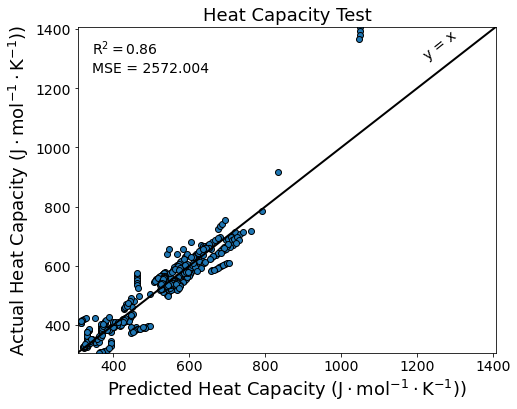

In [157]:
fig,ax1=plt.subplots(1,figsize=(7.5,6), facecolor='white') # We graph our test set predictions
ax1.grid(color='gray',axis='both',alpha=0)
ax1.set_axisbelow(True)

ax1.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)
ax1.set_facecolor('none')

ax1.set_xlim(np.floor(Final_Train_Target.min()), np.ceil(Final_Train_Target.max()))
ax1.set_ylim(np.floor(Final_Train_Target.min()), np.ceil(Final_Train_Target.max()))

ax1.set_xlabel('Predicted ' + Prop_name + ' ' + Units, fontsize=18)
ax1.set_ylabel('Actual ' + Prop_name + ' ' + Units, fontsize=18)

ax1.set_title(Prop_name + ' Test', fontsize=18)

plt.scatter(Final_Test_Predictions, Final_Test_Target, edgecolors='black')
plt.plot([0, np.ceil(Final_Train_Target.max())], [0, np.ceil(Final_Train_Target.max())], color = 'black', linewidth = 2)

plt.annotate('$\mathregular{R^{2}=}$'+str(np.round(r2_score(Final_Test_Target, Final_Test_Predictions),2)),(0.17,0.82), xycoords = 'figure fraction', fontsize=14)
plt.annotate('MSE = '+str(np.round(mean_squared_error(Final_Test_Target, Final_Test_Predictions),3)),(0.17,0.78), xycoords = 'figure fraction',fontsize=14)
plt.annotate('y = x ', (0.78,0.81), xycoords = 'figure fraction', rotation=38.6, fontsize=14)

plt.show()

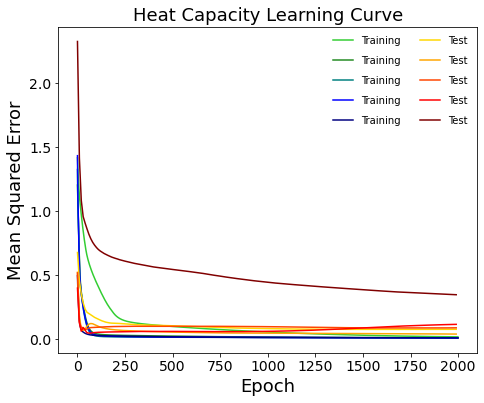

In [158]:
fig,ax1=plt.subplots(1,figsize=(7.5,6), facecolor='white') # We graph the learning process for each of our 5 training and test sets
ax1.grid(color='gray',axis='both',alpha=0)
ax1.set_axisbelow(True)

ax1.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)
ax1.set_facecolor('none')

ax1.set_xlabel('Epoch', fontsize=18)
ax1.set_ylabel('Mean Squared Error', fontsize=18)

ax1.set_title(Prop_name + ' Learning Curve', fontsize=18)

plt.plot(np.arange(0,len(Training_Losses[0]),1), Training_Losses[0], color='limegreen', label='Training')
plt.plot(np.arange(0,len(Training_Losses[1]),1), Training_Losses[1], color='forestgreen', label='Training')
plt.plot(np.arange(0,len(Training_Losses[2]),1), Training_Losses[2], color='teal', label='Training')
plt.plot(np.arange(0,len(Training_Losses[3]),1), Training_Losses[3], color='blue', label='Training')
plt.plot(np.arange(0,len(Training_Losses[4]),1), Training_Losses[4], color='navy', label='Training')

plt.plot(np.arange(0,len(Test_Losses[0])*Test_check,Test_check), Test_Losses[0], color='gold', label='Test')
plt.plot(np.arange(0,len(Test_Losses[1])*Test_check,Test_check), Test_Losses[1], color='orange', label='Test')
plt.plot(np.arange(0,len(Test_Losses[2])*Test_check,Test_check), Test_Losses[2], color='orangered', label='Test')
plt.plot(np.arange(0,len(Test_Losses[3])*Test_check,Test_check), Test_Losses[3], color='red', label='Test')
plt.plot(np.arange(0,len(Test_Losses[4])*Test_check,Test_check), Test_Losses[4], color='maroon', label='Test')

plt.legend(frameon=True, framealpha=0, fontsize=10, title_fontsize=12,  markerscale=1.75, labelspacing=1, ncol=2, columnspacing= 2)

plt.show()

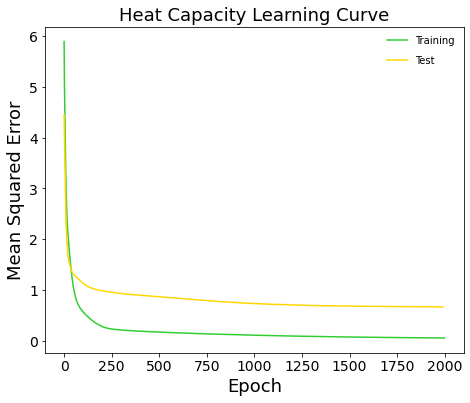

In [159]:
fig,ax1=plt.subplots(1,figsize=(7.5,6), facecolor='white') # We graph the cumulative learning process for all training and test sets
ax1.grid(color='gray',axis='both',alpha=0)
ax1.set_axisbelow(True)

ax1.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)
ax1.set_facecolor('none')

ax1.set_xlabel('Epoch', fontsize=18)
ax1.set_ylabel('Mean Squared Error', fontsize=18)

ax1.set_title(Prop_name + ' Learning Curve', fontsize=18)

plt.plot(np.arange(0,len(Training_Losses[0]),1), Training_Losses[0]+Training_Losses[1]+Training_Losses[2]+Training_Losses[3]+Training_Losses[4], color='limegreen', label='Training')

plt.plot(np.arange(0,len(Test_Losses[0])*Test_check,Test_check), Test_Losses[0]+Test_Losses[1]+Test_Losses[2]+Test_Losses[3]+Test_Losses[4], color='gold', label='Test')

plt.legend(frameon=True, framealpha=0, fontsize=10, title_fontsize=12,  markerscale=1.75, labelspacing=1, ncol=1, columnspacing= 0)

plt.show()